In [44]:
import networkx as nx 
import pandas as pd 
from matplotlib import pyplot as plt 

from jaal import Jaal 
from jaal.datasets import load_got

import numpy as np 
from networkx.algorithms import community

import pandas as pd

# BMI 567/667 Networkx Tutorial 
--- 

Written by Nate Evans (evansna@ohsu.edu)

--- 

[Networkx](https://networkx.org/documentation/stable/) is a python package developed for working with graph data. This class does not require students to use networkx or python for their projects; however, python and networkx are very powerful and extensible tools.  

The official `Networkx documentation` has a nice [tutorial](https://networkx.org/documentation/stable/tutorial.html), which covers much of the same material you'll see in this document. The purpose of *this* tutorial is to provide you the pythonic tools to handle BMI 567/667, and to be a "Movie Trailer" for the course - e.g., to show off some of the exciting applications of network science.

Be sure to check back in on [these](https://networkx.org/documentation/stable/auto_examples/index.html) networkx examples later on. 

# To start, let's make a graph 

In `networkx` graph Objects are created by calling `nx.Graph()`, which will initialize and empty graph - you will need to add all the desired edges, nodes and attributes. That said, there are a number of ways to create graphs from `csv` edge lists, adjacency matrices or load common graphs into local memory.  

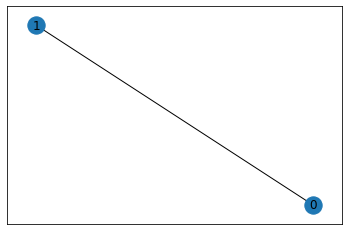

In [3]:
G = nx.Graph()          # initializes an empty undirected graph object (for directed graphs, use `nx.DiGraph`) 
G.add_edge(0, 1)        # add an edge from node 0 to node 1

nx.draw_networkx(G)     # plot the graph (this uses a force directed layout, we'll talk about this below)

Note that previously to `G.add_edge` there were no nodes and after this there were 2. The `add_edge` function will create new nodes if they don't already exist, but will use the current node if it's already in the graph. 

# Nodes do not have to be integers - can be strings! 

Although, note that some applications of graphs require integer identifiers for each node - but we can always assign an integer mapping later. 

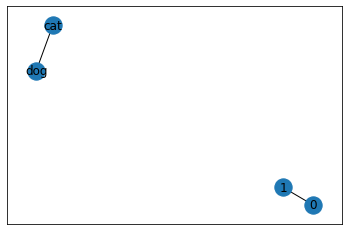

In [4]:
G.add_edge('dog', 'cat')
nx.draw_networkx(G)

# What if I have a whole bunch of edges? Do I have to wrap this in a loop?

Ick, no. 

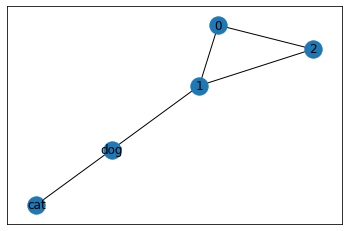

In [5]:
lots_of_edges = [(0, 2), (2,1), (1,'dog')]  # list of tuples containing edges connecting nodes u to v: [(u1,v1), (u2,v2),...]

G.add_edges_from(lots_of_edges)

nx.draw_networkx(G)

# We can add `attributes` to both **edges** and **nodes**.  

We can add attributes to nodes either during node creation or after the fact by accessing the node attributes directly. 

attribute dictionary: {'tree': False}


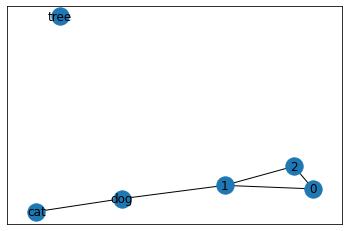

In [6]:
# first lets create a new node with an attribute
G.add_nodes_from([
    ('tree', {"is_animal": False}),
])

# note our `tree` node doesn't have any edges yet. 
nx.draw_networkx(G)

# but we can access the node attributes by 
print('attribute dictionary:', nx.get_node_attributes(G, name='is_animal'))

In [7]:
# we can also modify attributes after node creation by directly accessing the attribute dictionary
G.nodes['cat']['is_animal'] = True
G.nodes['dog']['is_animal'] = True
for i in range(3): 
    G.nodes[i]['is_animal'] = False

nx.get_node_attributes(G, name='is_animal')

{0: False, 1: False, 'dog': True, 'cat': True, 2: False, 'tree': False}

# Let's visualize the attributes! 

Can't stress how valuable graph visualizations are - both to understand your data and to debug issues. 

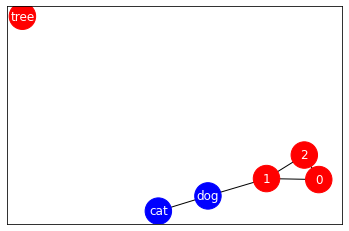

In [8]:
# we can also use the attributes for visualization 
attr_dict = nx.get_node_attributes(G, name='is_animal') 

nodelist = list(attr_dict.keys())
colors = [['r', 'b'][int(attr)] for attr in attr_dict.values()]

nx.draw_networkx(G, nodelist=nodelist, node_color=colors, font_color='w', node_size=700)

In [9]:
# YOUR TURN
# try adding a "good" attribute to the dog node, then plot the graph using node shape for the "good" attribute



# Let's learn to navigate the graph

Remember `generators`? These are super useful pythonic tool to *efficiently* loop through something. `networkx` uses generators to loop through the nodes... 


**General Python Tip**: If you are every curious about the python datatype you can use the function `type()` - or if you want to know what methods are attributed to an object, use `dir()` 


`G.nodes()` returns a **nodeview** objects, which if we call `iter()` (or wrap it in a loop - same thing) then we'll iterate through the graph nodes. 

Additionally, we can access node attributes using either the graph `G` or the `nodeview`. 

In [15]:
for node in G.nodes(): 
    print(node)

0
1
dog
cat
2
tree


In [20]:
nodeview = G.nodes()
for node in G.nodes(): 
    print('node:', node)
    print('nodeview access:', nodeview[node])
    print('graph access:', G[node])
    print()

node: 0
nodeview access: {'is_animal': False}
graph access: {1: {}, 2: {}}

node: 1
nodeview access: {'is_animal': False}
graph access: {0: {}, 2: {}, 'dog': {}}

node: dog
nodeview access: {'is_animal': True}
graph access: {'cat': {}, 1: {}}

node: cat
nodeview access: {'is_animal': True}
graph access: {'dog': {}}

node: 2
nodeview access: {'is_animal': False}
graph access: {0: {}, 1: {}}

node: tree
nodeview access: {'is_animal': False}
graph access: {}



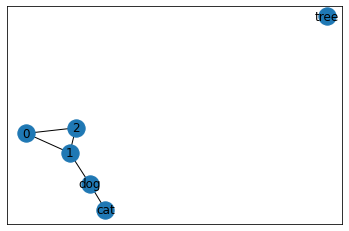

In [21]:
nx.draw_networkx(G)

# **Question:** What does nodeview access give you? What does Graph node access return to you? 

--- 
Response: 



---


# What if we want to navigate along graph elements starting from a given node? 

For instance, what if we want to know all the neighbors of the `dog` node? 

--- 
Response: 


--- 

# Try getting all the neighbors of node 33 in the `karate club graph` ... compare to the visualization - did it work? 

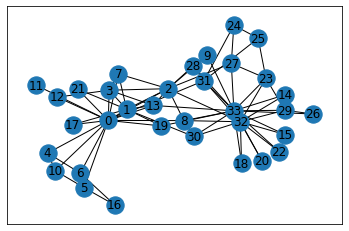

In [23]:
KCG = nx.karate_club_graph() 

nx.draw_networkx(KCG)

In [ ]:
# don't scroll down until you have tried this yourself :) 

# Some other tips and tricks 

Altherative ways to access neighbors include `nx.neighbors(graph, node)` ... this will return a iterator of the neighbors - just like iterating through a graph node view - see the nx master plan yet? 

Also, I know we haven't talked about it yet, but we can also create `Directed Graphs` (DiGraphs). For these graph types, you may want to know the  `children/successors` or `parents/predecessors` for this you can use the methods: `nx.successors(graph, node)` or `nx.predecessors`. 

# Graph metrics! 

We haven't covered this yet, but many metrics can be calculated for nodes, edges and whole-graphs. These metrics can be used to understand node or edge importance, graph connectness and density, and much more! 

To begin, let's introduce `node degree`: The degree of a node is the number of incoming or outgoing edges and can be further divided into `in-degree` and `out-degree`. 

The distribution of a graphs node-degrees is important in several ways - and this will be discussed later in the course. For now, let's explore how to get the degree of a node and graph. 

In [29]:
# shockingly simple... 
G.degree()

DegreeView({0: 2, 1: 3, 'dog': 2, 'cat': 1, 2: 2, 'tree': 0})

In [33]:
# for convenience, we can cast this to a dictionary ... and access attributes by key/value 
dict(G.degree()).values()

dict_values([2, 3, 2, 1, 2, 0])

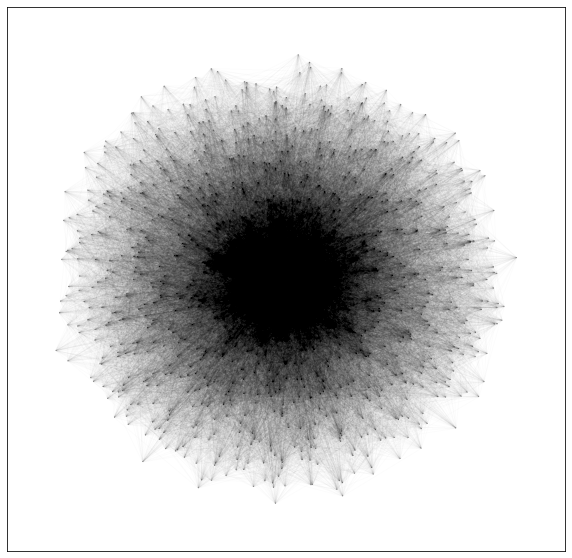

In [51]:
# plot the degree distribution for 

big_G = nx.dual_barabasi_albert_graph(n=1000, m1=50, m2=50, p=0.05, seed=0)

pos = nx.spring_layout(big_G)

plt.figure(figsize=(10,10))
nx.draw_networkx_edges(big_G, pos=pos, alpha=0.01)
plt.show()

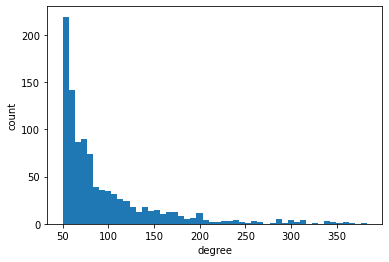

In [52]:

plt.figure()
plt.hist(dict(big_G.degree()).values(), bins=50)
plt.xlabel('degree')
plt.ylabel('count')
plt.show()

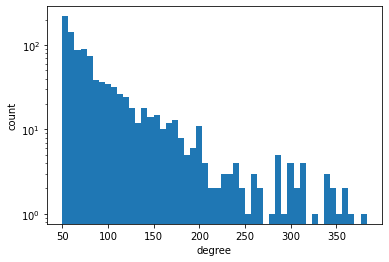

In [53]:
# for degree distributions, we often visualize in log counts. 

plt.figure()
plt.hist(dict(big_G.degree()).values(), bins=50)
plt.xlabel('degree')
plt.ylabel('count')
plt.yscale('log')
plt.show()

# BORING! Give me a more fun metric! 

Okay, let's calculate `degree centrality` - this is a general metric of how connected a node is to the rest of the graph. 

In [57]:
nx.centrality.degree_centrality(G)

{0: 0.4, 1: 0.6000000000000001, 'dog': 0.4, 'cat': 0.2, 2: 0.4, 'tree': 0.0}

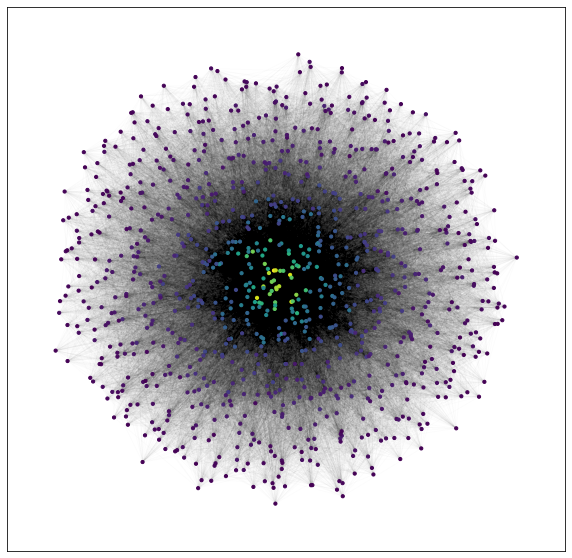

In [67]:
dc = dict(nx.centrality.degree_centrality(big_G))
nodelist = list(dc.keys())
centrality = list(dc.values())

plt.figure(figsize=(10,10))
nx.draw_networkx_edges(big_G, pos=pos, alpha=0.01)
nx.draw_networkx_nodes(big_G, pos=pos, nodelist=nodelist, node_color=centrality, alpha=1, node_size=10)
plt.show()

# Community detection

In many cases, we may want to investigate which nodes cluster in tightly connected groups - we call this `community detection`. We'll go into detail into the various methods and applications of community detection, but for now - let's see how easy it is in networkx :) 

We're going to use the [`girman-newman`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman) method, which assigns nodes to a community based on centrality. 

# Little more about graph visualization in networkx 

`networkx`'s plotting is built on top of `matplotlib`, so everyone who is familiar with this plotting package should be able to follow the syntax. If you are not familiar, I recommend reviewing some of the following resources: 

- [Matplotlib documentation & tutorials](https://matplotlib.org/stable/tutorials/index)
- [Towards tutorial](https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596)
- [Datacamp](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python) - *requires account* 

# Alternative Graph Visualization Tools

Pythons `matplotlib` and `netowrkx` has a lot of convenience and extensibility for plotting; however, it is not interactive and I've never been completely content with the plotting layouts (like force-directed/spring or circular), especially for large graphs. 

To improve on this, there are some other tools that have been developed for interactive graph visualization. Dr. Wu will introduce you to cytoscape. One pythonic approach that I like is the `Jaal` package. 

Let's try out Jaal... 

In [78]:
edge_df, node_df = load_got() 

edge_df.head()

,from,to,weight,strength
0,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,13,medium
1,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,34,medium
2,Aerys-II-Targaryen,Robert-Baratheon,12,medium
3,Aggo,Daenerys-Targaryen,11,medium
4,Alliser-Thorne,Jon-Snow,32,medium


In [79]:
node_df.head()

,id,gender,screentime
0,Illyrio-Mopatis,male,3.30
1,Jory-Cassel,male,6.15
2,Viserys-Targaryen,male,20.30
3,Mirri-Maz-Duur,female,7.30
4,Jhogo,male,1.00


In [76]:
# Jaal for network visualization 

Jaal(edge_df, node_df).plot()

Parsing the data...Done
Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [27/Dec/2021 12:05:32] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2021 12:05:33] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2021 12:05:33] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2021 12:05:33] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2021 12:05:33] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2021 12:05:33] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2021 12:05:33] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2021 12:05:33] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2021 12:05:33] "POST /_dash-update-component HTTP/1.1" 200 -


No trigger


127.0.0.1 - - [27/Dec/2021 12:05:44] "POST /_dash-update-component HTTP/1.1" 200 -


inside color node gender


127.0.0.1 - - [27/Dec/2021 12:05:46] "POST /_dash-update-component HTTP/1.1" 200 -


inside color edge strength


127.0.0.1 - - [27/Dec/2021 12:05:50] "POST /_dash-update-component HTTP/1.1" 200 -


Modifying node size using  screentime


127.0.0.1 - - [27/Dec/2021 12:06:05] "POST /_dash-update-component HTTP/1.1" 200 -


Modifying edge size using  weight


# Let's do a real analysis! 

Download [this](https://reactome.org/download/tools/ReatomeFIs/FIsInGene_122220_with_annotations.txt) file. It contains the Reactome Functional Interaction (FI) network. 

citation: 

Wu, G., Feng, X. & Stein, L. A human functional protein interaction network and its application to cancer data analysis. Genome Biol 11, R53 (2010). https://doi.org/10.1186/gb-2010-11-5-r53 

In [4]:
fi_data = pd.read_csv('../data/FIsInGene_122220_with_annotations.txt', sep='\t')
fi_data.head()

,Gene1,Gene2,Annotation,Direction,Score
0,16-5-5,CDC42,predicted,-,0.98
1,16-5-5,PARD3,predicted,-,1.00
2,16-5-5,PARD3B,predicted,-,1.00
3,A1CF,APOBEC1,catalyzed by; complex; input,<-,1.00
4,A1CF,EP300,expression regulated by,<-,1.00


In [5]:
fi_G = nx.from_pandas_edgelist(fi_data, source='Gene1', target='Gene2', edge_attr=['Annotation', 'Direction', 'Score'])

how many nodes/genes are there? 14006
how many edges are there? 259151
how many `predicted` edges are there? 41182
how many true/known edges are there? 217969
percentage of predicted edges: 15.89 %


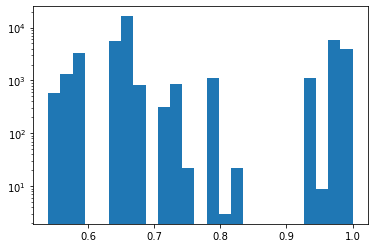

In [25]:
# first, let's get some basic info... (extract this info directly from the graph object, e.g., don't use the dataframe) 

n_nodes = len(fi_G)
print(f'how many nodes/genes are there? {n_nodes}')

n_edges = len(fi_G.edges())
print(f'how many edges are there? {n_edges}')

n_pred_edges = len([x for x in nx.get_edge_attributes(fi_G, 'Annotation').values() if x == 'predicted'])
print(f'how many `predicted` edges are there? {n_pred_edges}')

n_known_edges = len([x for x in nx.get_edge_attributes(fi_G, 'Annotation').values() if x != 'predicted'])
print(f'how many true/known edges are there? {n_known_edges}')

print(f'percentage of predicted edges: {(100*n_pred_edges / (n_known_edges + n_pred_edges)):.2f} %')


## plot the distribution of edge "score" of "predicted" edges. 
#### what y-axis scaling is most useful? 
scores = nx.get_edge_attributes(fi_G, 'Score')
annot = nx.get_edge_attributes(fi_G, 'Annotation')
pred_scores = [scores[edge] for edge in annot if annot[edge] == 'predicted']

plt.figure() 
plt.hist(pred_scores, bins=25)
plt.yscale('log')
plt.show()


# Are there isolates? multiple components? 

A graph can be in one or many components, additionally - some nodes may not have any edges, and we call these isolates. 

In [34]:
# how many isolates are there? 
len(list(nx.isolates(fi_G)))

0

In [36]:
# how many components are there?
comps = list(nx.connected_components(fi_G))
len(comps)

94

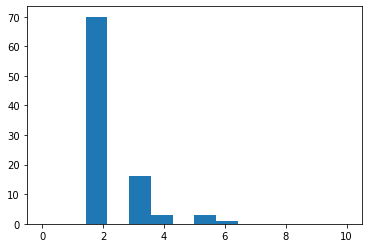

largest components: [13785, 6, 5, 5, 5]


In [51]:
# are there multiple large components? 

plt.figure()
plt.hist([len(x) for x in comps], bins=np.linspace(0,10,15))
plt.show()

print('largest components:', sorted([len(x) for x in comps])[::-1][0:5])

# Let's focus on just the largest component - filter all other nodes 

In [52]:
fi_G2 = nx.subgraph(fi_G, comps[0])
len(fi_G2) # confirm we used the right component

13785

# Plot the graph 

In [69]:
# this can take a while (~1-5 minutes) so make sure to just do it once 
# you can reduce the `iterations` (default 50) to speed the step up. 
# see docs: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html

pos = nx.spring_layout(fi_G2, iterations=5, k=10, seed=0)

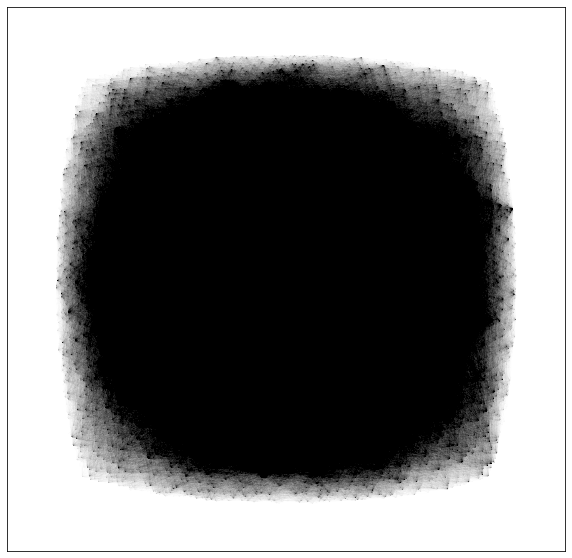

In [72]:
plt.figure(figsize=(10,10))
nx.draw_networkx_edges(fi_G2, pos=pos, alpha=0.002)
plt.show()

# networkx and matplotlib don't handle large graph visualization well 

Other tools, like `cytoscape`, `igraph`, `graphviz` or `graphia` are better suited for large graph visualization. 

For this tutorial, let's try to focus in on a smaller piece. How do we choose though? 

Download [this](http://www.gsea-msigdb.org/gsea/msigdb/download_geneset.jsp?geneSetName=GOBP_CELL_CYCLE&fileType=txt) gene set. (Cell Cycle Biological Process, Gene Ontology)

In [85]:
# create a subgraph using the geneset 

cell_cycle_genes = pd.read_csv('../data/geneset.txt', skiprows=2, header=None)[0].values.tolist()
print('# cell cycle genes:', len(cell_cycle_genes))
cell_cycle_genes[0:5]

# cell cycle genes: 1872


['AAAS', 'AATF', 'ABCB1', 'ABL1', 'ABRAXAS1']

In [83]:
fi_G3 = nx.subgraph(fi_G2, cell_cycle_genes)
len(fi_G3) # why is our graph smaller then the number of cell cycle genes?

1686

In [93]:
comps = list(nx.connected_components(fi_G3))
sorted([len(x) for x in comps])[::-1][0:5]

fi_G4 = nx.subgraph(fi_G3, comps[0])
len(fi_G4)

1588

In [120]:
pos = nx.spring_layout(fi_G4, iterations=100, k=1.5, seed=0)

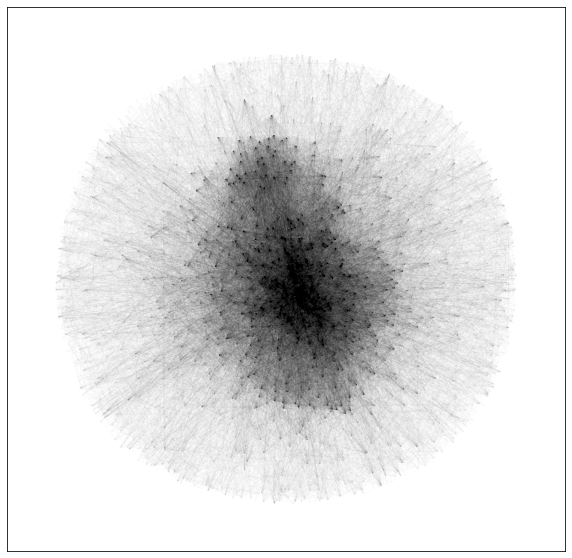

In [121]:
plt.figure(figsize=(10,10))
nx.draw_networkx_edges(fi_G4, pos=pos, alpha=0.01)
plt.show()

In [130]:
# what gene has the highest centrality? 
cent = nx.degree_centrality(fi_G4)
max_centrality = sorted(cent.values())[-1]
[k for k,v in cent.items() if v == max_centrality]

['CDK1']